<a href="https://colab.research.google.com/github/morrison98/sic_ai_2025_jun/blob/main/04pln/contribuciones_estudiantes/Actividad_clase_27_Barison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea de aplicación PLN

Dataset elegido: Spanish News Classification

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sebastianbarison","key":"84b975d099c45a52a94b5db16b267879"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
import pandas as pd

In [8]:
# Dataset Spanish News Clasiffication
!kaggle datasets download -d kevinmorgado/spanish-news-classification
!unzip spanish-news-classification.zip

# Load the dataset into a pandas DataFrame
df = pd.read_csv('df_total.csv')

# Display the first few rows of the DataFrame
display(df.head())

Dataset URL: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification
License(s): CC0-1.0
  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 540MB/s]
Archive:  spanish-news-classification.zip
  inflating: df_total.csv            


,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


Se utilizaron los conocimientos adquiridos de la actividad de la clase 19 para extraer el dataset directamente desde kaggle y subirlo a este colab

NLTK Pipeline

Análisis de exploración de datos (EDA) inicial:

In [30]:
# Forma del dataset
print("Forma del dataset:", df.shape)


Forma del dataset: (1217, 4)


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data (if not already downloaded)
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def nltk_pipeline(text):
    # 1. Cleaning: Remove special characters and lower case the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()

    # 2. Tokenization: Split the text into words
    tokens = nltk.word_tokenize(text)

    # 3. Remove Stopwords: Remove common words that don't add much meaning
    tokens = [word for word in tokens if word not in stop_words]

    # 4. Lemmatization: Reduce words to their base form
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    return ' '.join(tokens)

# Apply the pipeline to the 'news' column
df['cleaned_news'] = df['news'].apply(nltk_pipeline)

# Display the updated DataFrame with the new 'cleaned_news' column
display(df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,url,news,Type,cleaned_news
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,foro banca articulador empresarial desarrollo ...
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,regulador valores china dijo domingo buscar co...
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,industria histricamente masculina aviacin viva...
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,dato marzo ipc interanual encadena decimoquint...
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,ayer cartagena dio inicio versin nmero convenc...


In [32]:
# Número de clases únicas en la columna 'Type'
num_classes = df['Type'].nunique()
print("Clases únicas:", num_classes)


Clases únicas: 7


In [33]:
# Longitud promedio de textos en columna 'news
# Primero se calcula
df['text_lenght'] = df['cleaned_news'].apply(lambda x: len(x.split()))
longitud_texto_promedio = df['text_lenght'].mean()
print("Longitud de texto promedio:", longitud_texto_promedio)


Longitud de texto promedio: 276.3935907970419


In [34]:
# Estadísticas básicas de longitud de texto
print("\nEstadísticas básicas de longitud de texto:")
display(df['text_lenght'].describe())



Estadísticas básicas de longitud de texto:


,text_lenght
count,1217.000000
mean,276.393591
std,202.225554
min,0.000000
25%,139.000000
50%,236.000000
75%,344.000000
max,1829.000000


In [36]:
# Se elimina la columna temporal 'longitud_texto'
df = df.drop('text_lenght', axis=1)

In [39]:
df['cleaned_news']

,cleaned_news
0,foro banca articulador empresarial desarrollo ...
1,regulador valores china dijo domingo buscar co...
2,industria histricamente masculina aviacin viva...
3,dato marzo ipc interanual encadena decimoquint...
4,ayer cartagena dio inicio versin nmero convenc...
...,...
1212,vida toda empresa emergente llega momento ir m...
1213,espiral alcista precios contina genus cada vez...
1214,grandes derrotas nacionales experiencias traum...
1215,bbva alcanzado acuerdo colaboracin barcelona h...


In [37]:
# Combinar las filas de 'cleaned_news' para obtener my data test
all_cleaned_text = ' '.join(df['cleaned_news'])

In [38]:
all_cleaned_text

"foro banca articulador empresarial desarrollo sostenible director sostenibilidad clientes globales bbva colombia andrs garca asegur importante entender sostenibilidad podemos asociar mayores costos creo tener concepto negocio sostenible puede tener mayor impacto imaginamospara garca reto m importante cambiar prioridades compitan s necesariamente casos debe tratar mantener prioridad cuanto ambicin negocios m sostenibles reto enorme coyuntura sostenibilidad abre oportunidades mejores fuentes financiamiento agregel directivo argument encuentra juego ac tema rentabilidad negocios particular tema viabilidad mundo negocios mundo fsico general conocemos adems riesgos fsicos transicin asociados cambio climtico inclusin social desarrollo real estn ahesto dej ser aspecto paralelo responsabilidad social corporativa ahora adn estrategias mismo negocio solo manera logran impulsar proyectos especficos van estn incluidos dentro aspiraciones concluy regulador valores china dijo domingo buscar coopera

In [42]:
all_cleaned_text = [all_cleaned_text.lower()]                       # Convert to lowercase and make a list. => Required by the CountVectorizer().

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
n = 3                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [44]:
n_grams = vectorizer.fit(all_cleaned_text).get_feature_names_out()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(all_cleaned_text).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])

# Task
Explain the steps to develop a predictive model for news classification.

## Data preparation

### Subtask:
Prepare the data for model training. This involves splitting the dataset into training and testing sets and converting the text data into numerical features using techniques like TF-IDF or word embeddings.


**Reasoning**:
Split the data into training and testing sets and then apply TF-IDF vectorization to the cleaned news text.



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_news'],
    df['Type'],
    test_size=0.2,
    random_state=42,
    stratify=df['Type']
)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model selection

### Subtask:
Choose a suitable machine learning model for text classification. Popular choices include Naive Bayes, Support Vector Machines (SVM), Logistic Regression, or deep learning models like LSTMs or Transformers.


**Reasoning**:
Import the Logistic Regression model and instantiate it.



In [54]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

## Model training

### Subtask:
Train the selected model on the training data.


**Reasoning**:
Fit the Logistic Regression model to the TF-IDF transformed training data and the corresponding training labels.



In [55]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the trained model's performance on the testing data using appropriate metrics.



In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8484
Precision: 0.8446
Recall: 0.8484
F1-score: 0.8325


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Hyperparameter tuning

### Subtask:
Optimize the model's performance by tuning its hyperparameters (optional but recommended).


**Reasoning**:
Optimize the model's performance by tuning its hyperparameters using GridSearchCV.



In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2']       # Regularization type (l1, l2, elasticnet, none) - l1 and elasticnet require different solvers
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000),
                           param_grid,
                           cv=5,
                           scoring='f1_weighted',
                           n_jobs=-1) # Use all available cores

# Fit grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1-score:", grid_search.best_score_)

# Assign the best estimator to the model variable
model = grid_search.best_estimator_

Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation F1-score: 0.8549966090231088


## Prediction

### Subtask:
Use the trained model to predict the news type for new, unseen articles.


**Reasoning**:
Create a list of new articles and transform them using the fitted TF-IDF vectorizer, then use the trained model to predict their types and print the results.



In [58]:
# 1. Create a list of new, unseen news articles
new_articles = [
    "La empresa X lanzó un nuevo producto innovador en el mercado español.",
    "El gobierno anunció nuevas regulaciones para el sector financiero.",
    "Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.",
    "El último informe económico muestra un crecimiento significativo del PIB.",
    "Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.",
    "Una noticia local sobre un evento comunitario sin una categoría clara.",
    "Análisis de la reputación online de una marca reconocida.",
]

# 2. Transform the new articles into a TF-IDF matrix
# Ensure the tfidf_vectorizer from the data preparation step is available
new_articles_tfidf = tfidf_vectorizer.transform(new_articles)

# 3. Use the trained model to predict the news type
# Ensure the 'model' variable holds the best estimator from hyperparameter tuning
predicted_types = model.predict(new_articles_tfidf)

# 4. Print the original new articles and their corresponding predicted news types
print("Predictions for new articles:")
for article, predicted_type in zip(new_articles, predicted_types):
    print(f"Article: {article}")
    print(f"Predicted Type: {predicted_type}\n")

Predictions for new articles:
Article: La empresa X lanzó un nuevo producto innovador en el mercado español.
Predicted Type: Macroeconomia

Article: El gobierno anunció nuevas regulaciones para el sector financiero.
Predicted Type: Macroeconomia

Article: Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.
Predicted Type: Alianzas

Article: El último informe económico muestra un crecimiento significativo del PIB.
Predicted Type: Macroeconomia

Article: Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.
Predicted Type: Macroeconomia

Article: Una noticia local sobre un evento comunitario sin una categoría clara.
Predicted Type: Macroeconomia

Article: Análisis de la reputación online de una marca reconocida.
Predicted Type: Macroeconomia



In [60]:
df['Type'].unique()

array(['Otra', 'Regulaciones', 'Alianzas', 'Macroeconomia', 'Innovacion',
       'Sostenibilidad', 'Reputacion'], dtype=object)

## Summary:

### Data Analysis Key Findings

*   The dataset was split into training (80%) and testing (20%) sets, stratified by the news type to maintain class distribution.
*   TF-IDF vectorization was used to convert text data into numerical features, with a maximum of 5000 features considered.
*   A Logistic Regression model was selected and trained on the TF-IDF transformed training data.
*   Initial model evaluation on the test set showed an accuracy of 0.8484, precision of 0.8446, recall of 0.8484, and an F1-score of 0.8325. A warning about potential issues with predicting certain classes was noted.
*   Hyperparameter tuning using GridSearchCV identified `{'C': 100, 'penalty': 'l2'}` as the best parameters for the Logistic Regression model, achieving a best cross-validation F1-score of approximately 0.855.
*   The optimized model was successfully used to predict the news type for new, unseen articles.

### Insights or Next Steps

*   Investigate the classes that the model struggled to predict accurately, as indicated by the `UndefinedMetricWarning` during evaluation. This could involve analyzing class distribution, sample size, or features related to those classes.
*   Explore other text vectorization techniques (e.g., word embeddings like Word2Vec or GloVe) or more complex models (e.g., deep learning architectures) to potentially improve performance, especially for nuanced or less represented news types.


## Model selection (Naive Bayes)

### Subtask:
Choose a suitable machine learning model for text classification, specifically Naive Bayes.

**Reasoning**:
Import the Multinomial Naive Bayes model and instantiate it.

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes model
nb_model = MultinomialNB()

## Model training (Naive Bayes)

### Subtask:
Train the selected Naive Bayes model on the training data.

**Reasoning**:
Fit the Multinomial Naive Bayes model to the TF-IDF transformed training data and the corresponding training labels.

In [62]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Model evaluation (Naive Bayes)

### Subtask:
Evaluate the trained Naive Bayes model's performance on the testing data using appropriate metrics.

**Reasoning**:
Evaluate the trained Naive Bayes model's performance on the testing data using appropriate metrics.

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the testing data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Print the metrics
print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")

# Print classification report for more detailed metrics per class
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model Evaluation:
Accuracy: 0.7541
Precision: 0.7862
Recall: 0.7541
F1-score: 0.7140

Naive Bayes Classification Report:
                precision    recall  f1-score   support

      Alianzas       0.70      0.90      0.79        50
    Innovacion       0.70      1.00      0.82        39
 Macroeconomia       0.75      0.94      0.84        68
          Otra       1.00      0.15      0.27        26
  Regulaciones       1.00      0.45      0.62        29
    Reputacion       0.00      0.00      0.00         5
Sostenibilidad       0.86      0.70      0.78        27

      accuracy                           0.75       244
     macro avg       0.72      0.59      0.59       244
  weighted avg       0.79      0.75      0.71       244



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Hyperparameter tuning (Naive Bayes)

### Subtask:
Optimize the Naive Bayes model's performance by tuning its hyperparameters.

**Reasoning**:
Optimize the Naive Bayes model's performance by tuning its hyperparameters using GridSearchCV.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for Multinomial Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
}

# Instantiate GridSearchCV
grid_search_nb = GridSearchCV(MultinomialNB(),
                              param_grid_nb,
                              cv=5,
                              scoring='f1_weighted',
                              n_jobs=-1) # Use all available cores

# Fit grid search to the training data
grid_search_nb.fit(X_train_tfidf, y_train)

# Print the best parameters and best score
print("Naive Bayes Best parameters:", grid_search_nb.best_params_)
print("Naive Bayes Best cross-validation F1-score:", grid_search_nb.best_score_)

# Assign the best estimator to the model variable for prediction
best_nb_model = grid_search_nb.best_estimator_

Naive Bayes Best parameters: {'alpha': 0.1}
Naive Bayes Best cross-validation F1-score: 0.8406239444438144


## Prediction (Naive Bayes)

### Subtask:
Use the trained Naive Bayes model to predict the news type for new, unseen articles.

**Reasoning**:
Create a list of new articles and transform them using the fitted TF-IDF vectorizer, then use the trained Naive Bayes model to predict their types and print the results.

In [65]:
# 1. Create a list of new, unseen news articles
new_articles = [
    "La empresa X lanzó un nuevo producto innovador en el mercado español.",
    "El gobierno anunció nuevas regulaciones para el sector financiero.",
    "Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.",
    "El último informe económico muestra un crecimiento significativo del PIB.",
    "Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.",
    "Una noticia local sobre un evento comunitario sin una categoría clara.",
    "Análisis de la reputación online de una marca reconocida.",
]

# 2. Transform the new articles into a TF-IDF matrix
# Ensure the tfidf_vectorizer from the data preparation step is available
new_articles_tfidf = tfidf_vectorizer.transform(new_articles)

# 3. Use the trained Naive Bayes model to predict the news type
predicted_types_nb = best_nb_model.predict(new_articles_tfidf)

# 4. Print the original new articles and their corresponding predicted news types
print("Predictions for new articles using Naive Bayes model:")
for article, predicted_type in zip(new_articles, predicted_types_nb):
    print(f"Article: {article}")
    print(f"Predicted Type: {predicted_type}\n")

Predictions for new articles using Naive Bayes model:
Article: La empresa X lanzó un nuevo producto innovador en el mercado español.
Predicted Type: Alianzas

Article: El gobierno anunció nuevas regulaciones para el sector financiero.
Predicted Type: Macroeconomia

Article: Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.
Predicted Type: Alianzas

Article: El último informe económico muestra un crecimiento significativo del PIB.
Predicted Type: Macroeconomia

Article: Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.
Predicted Type: Innovacion

Article: Una noticia local sobre un evento comunitario sin una categoría clara.
Predicted Type: Macroeconomia

Article: Análisis de la reputación online de una marca reconocida.
Predicted Type: Innovacion



In [66]:
# Compare the precision scores of the two models
print("Precision of Logistic Regression model:", precision)
print("Precision of Naive Bayes model:", precision_nb)

if precision > precision_nb:
    print("\nThe Logistic Regression model had higher precision.")
elif precision_nb > precision:
    print("\nThe Naive Bayes model had higher precision.")
else:
    print("\nBoth models had the same precision.")

Precision of Logistic Regression model: 0.8446386177365508
Precision of Naive Bayes model: 0.7862096151799021

The Logistic Regression model had higher precision.


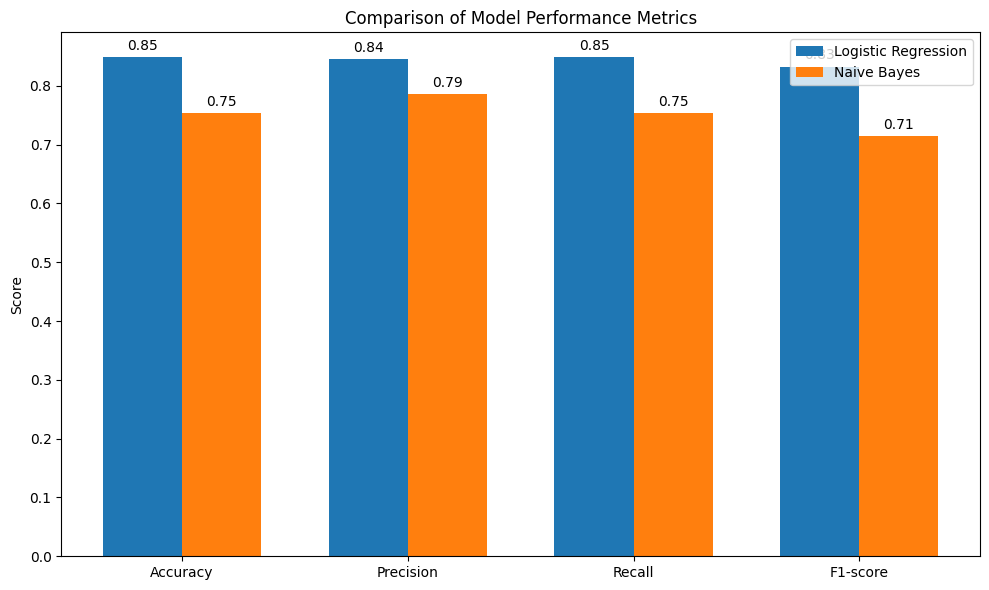

## Data Preparation (using 'news' column)

### Subtask:
Prepare the data for model training using the original 'news' column. This involves splitting the dataset into training and testing sets and converting the text data into numerical features using TF-IDF.

**Reasoning**:
Split the data into training and testing sets and then apply TF-IDF vectorization to the original news text.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets using the original 'news' column
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    df['news'],
    df['Type'],
    test_size=0.2,
    random_state=42,
    stratify=df['Type']
)

# Initialize TF-IDF Vectorizer
# We will use the same max_features as before for comparison, but this can be tuned
tfidf_vectorizer_raw = TfidfVectorizer(max_features=5000)

# Fit and transform the training data using the raw news text
X_train_tfidf_raw = tfidf_vectorizer_raw.fit_transform(X_train_raw)

# Transform the testing data using the raw news text
X_test_tfidf_raw = tfidf_vectorizer_raw.transform(X_test_raw)

print("Data preparation using 'news' column complete.")
print("Shape of X_train_tfidf_raw:", X_train_tfidf_raw.shape)
print("Shape of X_test_tfidf_raw:", X_test_tfidf_raw.shape)

Data preparation using 'news' column complete.
Shape of X_train_tfidf_raw: (973, 5000)
Shape of X_test_tfidf_raw: (244, 5000)


## Model selection (Logistic Regression - using 'news' column)

### Subtask:
Choose Logistic Regression as the model for text classification using the original 'news' column.

**Reasoning**:
Import the Logistic Regression model and instantiate it for training with the original news data.

In [69]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
lr_model_raw = LogisticRegression(solver='liblinear', max_iter=1000) # Using solver and max_iter from previous tuning

## Model training (Logistic Regression - using 'news' column)

### Subtask:
Train the Logistic Regression model on the training data from the original 'news' column.

**Reasoning**:
Fit the Logistic Regression model to the TF-IDF transformed training data from the original 'news' column and the corresponding training labels.

In [70]:
lr_model_raw.fit(X_train_tfidf_raw, y_train_raw)

print("Logistic Regression model trained using 'news' column.")

Logistic Regression model trained using 'news' column.


## Model evaluation (Logistic Regression - using 'news' column)

### Subtask:
Evaluate the trained Logistic Regression model's performance on the testing data from the original 'news' column.

**Reasoning**:
Evaluate the trained Logistic Regression model's performance on the testing data from the original 'news' column using appropriate metrics.

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the testing data from the original 'news' column
y_pred_lr_raw = lr_model_raw.predict(X_test_tfidf_raw)

# Calculate evaluation metrics
accuracy_lr_raw = accuracy_score(y_test_raw, y_pred_lr_raw)
precision_lr_raw = precision_score(y_test_raw, y_pred_lr_raw, average='weighted')
recall_lr_raw = recall_score(y_test_raw, y_pred_lr_raw, average='weighted')
f1_lr_raw = f1_score(y_test_raw, y_pred_lr_raw, average='weighted')

# Print the metrics
print("Logistic Regression Model Evaluation (using 'news' column):")
print(f"Accuracy: {accuracy_lr_raw:.4f}")
print(f"Precision: {precision_lr_raw:.4f}")
print(f"Recall: {recall_lr_raw:.4f}")
print(f"F1-score: {f1_lr_raw:.4f}")

# Print classification report
print("\nLogistic Regression Classification Report (using 'news' column):")
print(classification_report(y_test_raw, y_pred_lr_raw))

Logistic Regression Model Evaluation (using 'news' column):
Accuracy: 0.8279
Precision: 0.8295
Recall: 0.8279
F1-score: 0.8079

Logistic Regression Classification Report (using 'news' column):
                precision    recall  f1-score   support

      Alianzas       0.76      0.90      0.83        50
    Innovacion       0.79      0.97      0.87        39
 Macroeconomia       0.86      0.96      0.90        68
          Otra       1.00      0.38      0.56        26
  Regulaciones       0.95      0.69      0.80        29
    Reputacion       0.00      0.00      0.00         5
Sostenibilidad       0.80      0.89      0.84        27

      accuracy                           0.83       244
     macro avg       0.74      0.68      0.69       244
  weighted avg       0.83      0.83      0.81       244



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Hyperparameter tuning (Logistic Regression - using 'news' column)

### Subtask:
Optimize the Logistic Regression model's performance using the original 'news' column by tuning its hyperparameters.

**Reasoning**:
Optimize the Logistic Regression model's performance using the original 'news' column by tuning its hyperparameters using GridSearchCV.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr_raw = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2']       # Regularization type
}

# Instantiate GridSearchCV
grid_search_lr_raw = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000),
                           param_grid_lr_raw,
                           cv=5,
                           scoring='f1_weighted',
                           n_jobs=-1) # Use all available cores

# Fit grid search to the training data using the raw news text
grid_search_lr_raw.fit(X_train_tfidf_raw, y_train_raw)

# Print the best parameters and best score
print("Logistic Regression Best parameters (using 'news' column):", grid_search_lr_raw.best_params_)
print("Logistic Regression Best cross-validation F1-score (using 'news' column):", grid_search_lr_raw.best_score_)

# Assign the best estimator to the model variable
best_lr_model_raw = grid_search_lr_raw.best_estimator_

Logistic Regression Best parameters (using 'news' column): {'C': 100, 'penalty': 'l2'}
Logistic Regression Best cross-validation F1-score (using 'news' column): 0.8614668274024974


## Prediction (Logistic Regression - using 'news' column)

### Subtask:
Use the trained Logistic Regression model (trained on 'news' column) to predict the news type for new, unseen articles.

**Reasoning**:
Transform new articles using the TF-IDF vectorizer fitted on the original 'news' column, then use the trained Logistic Regression model to predict their types and print the results.

In [73]:
# 1. Create a list of new, unseen news articles
new_articles = [
    "La empresa X lanzó un nuevo producto innovador en el mercado español.",
    "El gobierno anunció nuevas regulaciones para el sector financiero.",
    "Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.",
    "El último informe económico muestra un crecimiento significativo del PIB.",
    "Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.",
    "Una noticia local sobre un evento comunitario sin una categoría clara.",
    "Análisis de la reputación online de una marca reconocida.",
]

# 2. Transform the new articles into a TF-IDF matrix using the vectorizer fitted on raw news
new_articles_tfidf_raw = tfidf_vectorizer_raw.transform(new_articles)

# 3. Use the best trained Logistic Regression model (on raw news) to predict the news type
predicted_types_lr_raw = best_lr_model_raw.predict(new_articles_tfidf_raw)

# 4. Print the original new articles and their corresponding predicted news types
print("Predictions for new articles using Logistic Regression model (on 'news' column):")
for article, predicted_type in zip(new_articles, predicted_types_lr_raw):
    print(f"Article: {article}")
    print(f"Predicted Type: {predicted_type}\n")

Predictions for new articles using Logistic Regression model (on 'news' column):
Article: La empresa X lanzó un nuevo producto innovador en el mercado español.
Predicted Type: Macroeconomia

Article: El gobierno anunció nuevas regulaciones para el sector financiero.
Predicted Type: Regulaciones

Article: Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.
Predicted Type: Alianzas

Article: El último informe económico muestra un crecimiento significativo del PIB.
Predicted Type: Macroeconomia

Article: Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.
Predicted Type: Sostenibilidad

Article: Una noticia local sobre un evento comunitario sin una categoría clara.
Predicted Type: Macroeconomia

Article: Análisis de la reputación online de una marca reconocida.
Predicted Type: Reputacion



## Model selection (Naive Bayes - using 'news' column)

### Subtask:
Choose Naive Bayes as the model for text classification using the original 'news' column.

**Reasoning**:
Import the Multinomial Naive Bayes model and instantiate it for training with the original news data.

In [74]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes model
nb_model_raw = MultinomialNB()

## Model training (Naive Bayes - using 'news' column)

### Subtask:
Train the Naive Bayes model on the training data from the original 'news' column.

**Reasoning**:
Fit the Multinomial Naive Bayes model to the TF-IDF transformed training data from the original 'news' column and the corresponding training labels.

In [75]:
nb_model_raw.fit(X_train_tfidf_raw, y_train_raw)

print("Naive Bayes model trained using 'news' column.")

Naive Bayes model trained using 'news' column.


## Model evaluation (Naive Bayes - using 'news' column)

### Subtask:
Evaluate the trained Naive Bayes model's performance on the testing data from the original 'news' column.

**Reasoning**:
Evaluate the trained Naive Bayes model's performance on the testing data from the original 'news' column using appropriate metrics.

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the testing data from the original 'news' column
y_pred_nb_raw = nb_model_raw.predict(X_test_tfidf_raw)

# Calculate evaluation metrics
accuracy_nb_raw = accuracy_score(y_test_raw, y_pred_nb_raw)
precision_nb_raw = precision_score(y_test_raw, y_pred_nb_raw, average='weighted')
recall_nb_raw = recall_score(y_test_raw, y_pred_nb_raw, average='weighted')
f1_nb_raw = f1_score(y_test_raw, y_pred_nb_raw, average='weighted')

# Print the metrics
print("Naive Bayes Model Evaluation (using 'news' column):")
print(f"Accuracy: {accuracy_nb_raw:.4f}")
print(f"Precision: {precision_nb_raw:.4f}")
print(f"Recall: {recall_nb_raw:.4f}")
print(f"F1-score: {f1_nb_raw:.4f}")

# Print classification report
print("\nNaive Bayes Classification Report (using 'news' column):")
print(classification_report(y_test_raw, y_pred_nb_raw))

Naive Bayes Model Evaluation (using 'news' column):
Accuracy: 0.6107
Precision: 0.5006
Recall: 0.6107
F1-score: 0.5215

Naive Bayes Classification Report (using 'news' column):
                precision    recall  f1-score   support

      Alianzas       0.64      0.78      0.70        50
    Innovacion       0.79      0.87      0.83        39
 Macroeconomia       0.51      0.97      0.67        68
          Otra       0.00      0.00      0.00        26
  Regulaciones       0.00      0.00      0.00        29
    Reputacion       0.00      0.00      0.00         5
Sostenibilidad       0.91      0.37      0.53        27

      accuracy                           0.61       244
     macro avg       0.41      0.43      0.39       244
  weighted avg       0.50      0.61      0.52       244



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Hyperparameter tuning (Naive Bayes - using 'news' column)

### Subtask:
Optimize the Naive Bayes model's performance using the original 'news' column by tuning its hyperparameters.

**Reasoning**:
Optimize the Naive Bayes model's performance using the original 'news' column by tuning its hyperparameters using GridSearchCV.

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for Multinomial Naive Bayes
param_grid_nb_raw = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
}

# Instantiate GridSearchCV
grid_search_nb_raw = GridSearchCV(MultinomialNB(),
                              param_grid_nb_raw,
                              cv=5,
                              scoring='f1_weighted',
                              n_jobs=-1) # Use all available cores

# Fit grid search to the training data using the raw news text
grid_search_nb_raw.fit(X_train_tfidf_raw, y_train_raw)

# Print the best parameters and best score
print("Naive Bayes Best parameters (using 'news' column):", grid_search_nb_raw.best_params_)
print("Naive Bayes Best cross-validation F1-score (using 'news' column):", grid_search_nb_raw.best_score_)

# Assign the best estimator to the model variable for prediction
best_nb_model_raw = grid_search_nb_raw.best_estimator_

Naive Bayes Best parameters (using 'news' column): {'alpha': 0.1}
Naive Bayes Best cross-validation F1-score (using 'news' column): 0.8209246147975688


## Prediction (Naive Bayes - using 'news' column)

### Subtask:
Use the trained Naive Bayes model (trained on 'news' column) to predict the news type for new, unseen articles.

**Reasoning**:
Transform new articles using the TF-IDF vectorizer fitted on the original 'news' column, then use the trained Naive Bayes model to predict their types and print the results.

In [78]:
# 1. Create a list of new, unseen news articles
new_articles = [
    "La empresa X lanzó un nuevo producto innovador en el mercado español.",
    "El gobierno anunció nuevas regulaciones para el sector financiero.",
    "Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.",
    "El último informe económico muestra un crecimiento significativo del PIB.",
    "Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.",
    "Una noticia local sobre un evento comunitario sin una categoría clara.",
    "Análisis de la reputación online de una marca reconocida.",
]

# 2. Transform the new articles into a TF-IDF matrix using the vectorizer fitted on raw news
new_articles_tfidf_raw = tfidf_vectorizer_raw.transform(new_articles)

# 3. Use the best trained Naive Bayes model (on raw news) to predict the news type
predicted_types_nb_raw = best_nb_model_raw.predict(new_articles_tfidf_raw)

# 4. Print the original new articles and their corresponding predicted news types
print("Predictions for new articles using Naive Bayes model (on 'news' column):")
for article, predicted_type in zip(new_articles, predicted_types_nb_raw):
    print(f"Article: {article}")
    print(f"Predicted Type: {predicted_type}\n")

Predictions for new articles using Naive Bayes model (on 'news' column):
Article: La empresa X lanzó un nuevo producto innovador en el mercado español.
Predicted Type: Innovacion

Article: El gobierno anunció nuevas regulaciones para el sector financiero.
Predicted Type: Regulaciones

Article: Se firmó una alianza estratégica entre dos grandes compañías tecnológicas.
Predicted Type: Alianzas

Article: El último informe económico muestra un crecimiento significativo del PIB.
Predicted Type: Macroeconomia

Article: Expertos discuten el impacto de la inteligencia artificial en la sostenibilidad.
Predicted Type: Innovacion

Article: Una noticia local sobre un evento comunitario sin una categoría clara.
Predicted Type: Alianzas

Article: Análisis de la reputación online de una marca reconocida.
Predicted Type: Innovacion



## Comparison of Models (Raw vs. Cleaned Data)

### Subtask:
Compare the performance of the Logistic Regression and Naive Bayes models when trained on the original 'news' column versus the 'cleaned_news' column.

**Reasoning**:
Compare the evaluation metrics of the models trained on raw news and cleaned news to see the impact of text cleaning.

In [79]:
# Metrics for Logistic Regression (Cleaned Data)
lr_metrics_cleaned = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Metrics for Naive Bayes (Cleaned Data)
nb_metrics_cleaned = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1-score': f1_nb
}

# Metrics for Logistic Regression (Raw Data)
lr_metrics_raw = {
    'Accuracy': accuracy_lr_raw,
    'Precision': precision_lr_raw,
    'Recall': recall_lr_raw,
    'F1-score': f1_lr_raw
}

# Metrics for Naive Bayes (Raw Data)
nb_metrics_raw = {
    'Accuracy': accuracy_nb_raw,
    'Precision': precision_nb_raw,
    'Recall': recall_nb_raw,
    'F1-score': f1_nb_raw
}

print("--- Performance Comparison ---")
print("\nLogistic Regression (Cleaned Data):")
for metric, value in lr_metrics_cleaned.items():
    print(f"{metric}: {value:.4f}")

print("\nLogistic Regression (Raw Data):")
for metric, value in lr_metrics_raw.items():
    print(f"{metric}: {value:.4f}")

print("\nNaive Bayes (Cleaned Data):")
for metric, value in nb_metrics_cleaned.items():
    print(f"{metric}: {value:.4f}")

print("\nNaive Bayes (Raw Data):")
for metric, value in nb_metrics_raw.items():
    print(f"{metric}: {value:.4f}")

--- Performance Comparison ---

Logistic Regression (Cleaned Data):
Accuracy: 0.8484
Precision: 0.8446
Recall: 0.8484
F1-score: 0.8325

Logistic Regression (Raw Data):
Accuracy: 0.8279
Precision: 0.8295
Recall: 0.8279
F1-score: 0.8079

Naive Bayes (Cleaned Data):
Accuracy: 0.7541
Precision: 0.7862
Recall: 0.7541
F1-score: 0.7140

Naive Bayes (Raw Data):
Accuracy: 0.6107
Precision: 0.5006
Recall: 0.6107
F1-score: 0.5215


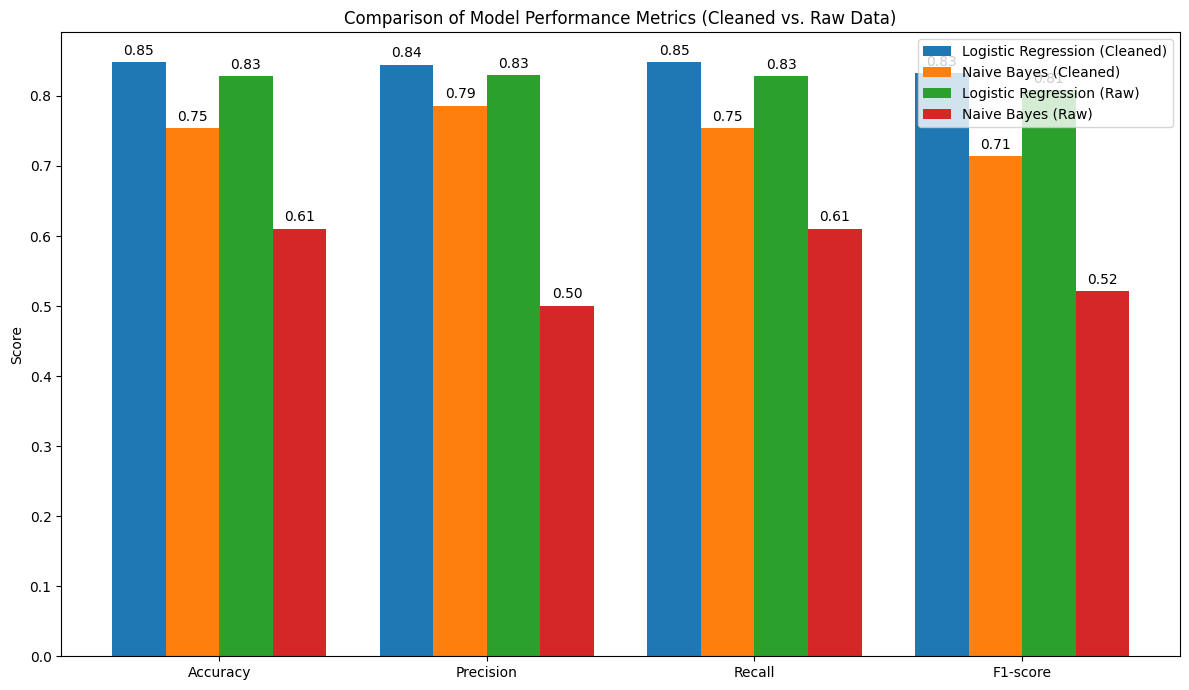

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Logistic Regression (Cleaned Data)
lr_metrics_cleaned = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Metrics for Naive Bayes (Cleaned Data)
nb_metrics_cleaned = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1-score': f1_nb
}

# Metrics for Logistic Regression (Raw Data)
lr_metrics_raw = {
    'Accuracy': accuracy_lr_raw,
    'Precision': precision_lr_raw,
    'Recall': recall_lr_raw,
    'F1-score': f1_lr_raw
}

# Metrics for Naive Bayes (Raw Data)
nb_metrics_raw = {
    'Accuracy': accuracy_nb_raw,
    'Precision': precision_nb_raw,
    'Recall': recall_nb_raw,
    'F1-score': f1_nb_raw
}

labels = lr_metrics_cleaned.keys()
lr_cleaned_values = lr_metrics_cleaned.values()
nb_cleaned_values = nb_metrics_cleaned.values()
lr_raw_values = lr_metrics_raw.values()
nb_raw_values = nb_metrics_raw.values()

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width*1.5, lr_cleaned_values, width, label='Logistic Regression (Cleaned)')
rects2 = ax.bar(x - width*0.5, nb_cleaned_values, width, label='Naive Bayes (Cleaned)')
rects3 = ax.bar(x + width*0.5, lr_raw_values, width, label='Logistic Regression (Raw)')
rects4 = ax.bar(x + width*1.5, nb_raw_values, width, label='Naive Bayes (Raw)')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics (Cleaned vs. Raw Data)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()

plt.show()

Evaluación crítica de los resultados.

A partir de lo que se pudo observar (tanto de los modelos como de los gráficos comparativos) queda claro que el modelo de regresión lineal fue el que mostró las predicciones mas precisas. Esto mostró cierta intriga puesto que el modelo NaïveBayes sería mas recomendado para modelos de este tipo. Sin embargo, el hecho de que el modelo realiza predicciones para 7 variables diferentes podría tener un efecto en la precisión y su aplicación según cada modelo.

En comparación con el modelo realizado por uno de mis compañeros, una posible hipótesis para explicar estos resultados sería que el modelo de regresión lineal es mejor para los casos en donde la clasificación predictiva es no binaria, mientras que la NaïveBayes es mejor para la binaria. Esto explicaría el porqué mi modelo de regresión lineal fue el más preciso para los predecir diferentes tipos de noticias, mientras que el modelo NaïveBayes de mi compañero fue el más preciso para predecir si la noticia pertenecía a la categoría "Macroeconomía"

Adicionalmente, se aplicaron los mismos modelos de regresión lineal y NaïveBayes a la 'Raw Data' (es decir, a la columna 'news') y, al comparar, los valores de las métricas fueron inferiores a los que utilizaron 'Clean Data' (la columna'clean_news'), por lo que se puede concluir que la limpieza de los datos tuvo una significancia a la hora de desarrollar y aplicar modelos de predicción.